In [391]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

In [392]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [393]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import tensorflow as tf

In [394]:
df = pd.read_csv("Stats.csv",index_col = 0)

In [395]:
df

,Rating,Accuracy,Shot fired,Hits,Deaths,DMG_Get
0,70.8,20.10%,3509,704,40,464
1,55.8,15.80%,4771,753,54,591
2,47.6,16.70%,3526,589,59,549
3,47.5,15.20%,3184,484,42,442
4,24.7,10.30%,3481,359,66,583
...,...,...,...,...,...,...
931,70.4,12.40%,1383,171,4,100
932,30.7,10.70%,768,82,10,107
933,25.5,10.80%,500,54,6,85
934,16.3,11.20%,760,85,26,212


In [396]:
len(df)

936

In [397]:
df = df[1:]

In [398]:
def proc(acc):
    acc = acc[:-1]
    return acc

In [399]:
df["Accuracy"] = df["Accuracy"].apply(proc).apply(float)

C:\Users\kacpe\AppData\Local\Temp/ipykernel_5880/1612334256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Accuracy"] = df["Accuracy"].apply(proc).apply(float)


In [400]:
#sns.pairplot(df)

In [401]:
from sklearn.model_selection import train_test_split

In [402]:
X = df.drop("Rating", axis = 1)
y = df["Rating"]

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)


In [404]:
X_train

,Accuracy,Shot fired,Hits,Deaths,DMG_Get
263,14.7,2162,318,31,290
331,22.1,4255,940,45,456
479,4.9,1923,95,59,506
581,13.9,1278,178,39,374
901,9.0,3392,306,27,286
...,...,...,...,...,...
382,5.9,7076,415,114,949
272,11.3,1097,124,50,395
62,14.8,758,112,59,369
740,9.3,2580,239,41,421


In [405]:
scaler = MinMaxScaler()

In [406]:
X_train = scaler.fit_transform(X_train)

In [407]:
X_test = scaler.transform(X_test)

In [408]:
X_train.shape

(748, 5)

In [409]:
X_test.shape

(187, 5)

In [304]:
#Deep Learining

In [305]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [438]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [212]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
6/6 [==============================] - 1s 28ms/step - loss: 47.3367 - val_loss: 46.1532
Epoch 2/400
6/6 [==============================] - 0s 6ms/step - loss: 47.2650 - val_loss: 46.0666
Epoch 3/400
6/6 [==============================] - 0s 6ms/step - loss: 47.1615 - val_loss: 45.9350
Epoch 4/400
6/6 [==============================] - 0s 6ms/step - loss: 47.0037 - val_loss: 45.7316
Epoch 5/400
6/6 [==============================] - 0s 6ms/step - loss: 46.7557 - val_loss: 45.4045
Epoch 6/400
6/6 [==============================] - 0s 6ms/step - loss: 46.3478 - val_loss: 44.8564
Epoch 7/400
6/6 [==============================] - 0s 6ms/step - loss: 45.6566 - val_loss: 43.9170
Epoch 8/400
6/6 [==============================] - 0s 6ms/step - loss: 44.4736 - val_loss: 42.2882
Epoch 9/400
6/6 [==============================] - 0s 6ms/step - loss: 42.4055 - val_loss: 39.4764
Epoch 10/400
6/6 [==============================] - 0s 6ms/step - loss: 38.8191 - val_loss: 34.5764
Epoch 11

6/6 [==============================] - 0s 6ms/step - loss: 5.5345 - val_loss: 4.9956
Epoch 85/400
6/6 [==============================] - 0s 8ms/step - loss: 5.3865 - val_loss: 4.9567
Epoch 86/400
6/6 [==============================] - 0s 8ms/step - loss: 5.3643 - val_loss: 5.0740
Epoch 87/400
6/6 [==============================] - 0s 7ms/step - loss: 5.3861 - val_loss: 4.9255
Epoch 88/400
6/6 [==============================] - 0s 7ms/step - loss: 5.3706 - val_loss: 5.0637
Epoch 89/400
6/6 [==============================] - 0s 7ms/step - loss: 5.3040 - val_loss: 4.8975
Epoch 90/400
6/6 [==============================] - 0s 6ms/step - loss: 5.2525 - val_loss: 4.8806
Epoch 91/400
6/6 [==============================] - 0s 6ms/step - loss: 5.2297 - val_loss: 4.8644
Epoch 92/400
6/6 [==============================] - 0s 6ms/step - loss: 5.1905 - val_loss: 4.8702
Epoch 93/400
6/6 [==============================] - 0s 6ms/step - loss: 5.1505 - val_loss: 4.8203
Epoch 94/400
6/6 [===============

6/6 [==============================] - 0s 6ms/step - loss: 4.2958 - val_loss: 4.2930
Epoch 168/400
6/6 [==============================] - 0s 6ms/step - loss: 4.2575 - val_loss: 4.2694
Epoch 169/400
6/6 [==============================] - 0s 6ms/step - loss: 4.2696 - val_loss: 4.3311
Epoch 170/400
6/6 [==============================] - 0s 6ms/step - loss: 4.3674 - val_loss: 4.2588
Epoch 171/400
6/6 [==============================] - 0s 6ms/step - loss: 4.3331 - val_loss: 4.5090
Epoch 172/400
6/6 [==============================] - 0s 6ms/step - loss: 4.2776 - val_loss: 4.3895
Epoch 173/400
6/6 [==============================] - 0s 6ms/step - loss: 4.2276 - val_loss: 4.2988
Epoch 174/400
6/6 [==============================] - 0s 6ms/step - loss: 4.2032 - val_loss: 4.2684
Epoch 175/400
6/6 [==============================] - 0s 6ms/step - loss: 4.1699 - val_loss: 4.1994
Epoch 176/400
6/6 [==============================] - 0s 6ms/step - loss: 4.1522 - val_loss: 4.2893
Epoch 177/400
6/6 [=====

Epoch 250/400
6/6 [==============================] - 0s 6ms/step - loss: 3.8687 - val_loss: 3.9781
Epoch 251/400
6/6 [==============================] - 0s 6ms/step - loss: 3.8334 - val_loss: 4.0639
Epoch 252/400
6/6 [==============================] - 0s 6ms/step - loss: 3.8405 - val_loss: 4.1042
Epoch 253/400
6/6 [==============================] - 0s 6ms/step - loss: 3.8829 - val_loss: 4.0432
Epoch 254/400
6/6 [==============================] - 0s 6ms/step - loss: 3.7833 - val_loss: 4.0421
Epoch 255/400
6/6 [==============================] - 0s 6ms/step - loss: 3.7814 - val_loss: 4.0582
Epoch 256/400
6/6 [==============================] - 0s 6ms/step - loss: 3.7839 - val_loss: 4.0449
Epoch 257/400
6/6 [==============================] - 0s 6ms/step - loss: 3.8468 - val_loss: 4.1072
Epoch 258/400
6/6 [==============================] - 0s 6ms/step - loss: 3.7992 - val_loss: 4.0086
Epoch 259/400
6/6 [==============================] - 0s 6ms/step - loss: 3.7769 - val_loss: 4.0039
Epoch 260/

In [213]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

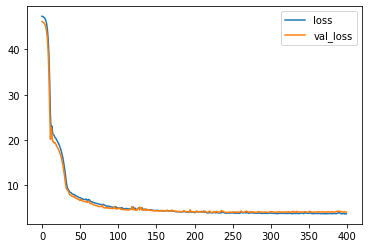

In [214]:
losses.plot()

In [215]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [216]:
predictions = model.predict(X_test)

6/6 [==============================] - 0s 1ms/step


In [217]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.031568348726487
MSE: 73.99622587443763
RMSE: 8.602105897653065


In [218]:
#Much better 
# Error is 2 times smaller and Neuron Model copes better with outliers

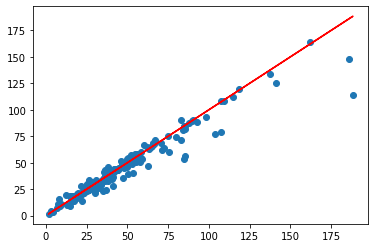

In [219]:
# Our predictions
plt.scatter(y_test,predictions)

# Real Value
plt.plot(y_test,y_test,'r')

In [220]:
#Project Output

In [222]:
y_test.values.reshape(len(X_test))
df1 = pd.DataFrame(y_test.values.reshape(len(X_test),1))
df2 = pd.DataFrame(predictions)
df3 = pd.DataFrame(X_test)
df12 = pd.concat([df1,df2], axis = 1)

In [223]:
data = pd.DataFrame(X_test)
data = data.reset_index()
data = data.drop("index", axis = 1)
data

,0,1,2,3,4
0,0.080178,0.135603,0.028840,0.034188,0.052838
1,0.596882,0.563986,0.741113,0.521368,0.595890
2,0.438753,0.102289,0.130114,0.042735,0.090998
3,0.521158,0.139419,0.193830,0.119658,0.128180
4,0.465479,0.339008,0.363514,0.316239,0.368885
...,...,...,...,...,...
182,0.507795,0.112709,0.161636,0.393162,0.241683
183,0.329621,0.418110,0.311201,0.350427,0.480431
184,0.055679,0.058409,0.011402,0.170940,0.146771
185,0.354120,0.144702,0.136150,0.059829,0.141879


In [224]:
final = pd.concat([data,df12],axis = 1)
final.columns = ['Accuracy', 'Shot fired', 'Hits', 'Deaths',"DMG_Get", 'Rating', "Predictions"]
final.drop(['Accuracy', 'Shot fired', 'Hits', 'Deaths',"DMG_Get"],axis = 1,inplace=True)
final

,Rating,Predictions
0,17.3,18.044312
1,87.9,87.941376
2,70.4,68.598495
3,85.2,84.452797
4,62.2,64.723740
...,...,...
182,51.3,53.435608
183,38.1,36.739895
184,3.2,3.052486
185,49.5,46.318333


In [225]:
final["Diff"] = final["Rating"] - final["Predictions"]

In [226]:
final

,Rating,Predictions,Diff
0,17.3,18.044312,-0.744312
1,87.9,87.941376,-0.041376
2,70.4,68.598495,1.801505
3,85.2,84.452797,0.747203
4,62.2,64.723740,-2.523740
...,...,...,...
182,51.3,53.435608,-2.135608
183,38.1,36.739895,1.360105
184,3.2,3.052486,0.147514
185,49.5,46.318333,3.181667


In [227]:
len(final[abs(final["Diff"]) < 5]) / len(final) * 100

77.54010695187165

In [228]:
#almost 70% of predictions miss less than 5

# Without Outlaiers

In [410]:
df_100 = df[df["Rating"] < 100]

In [411]:
df_100

,Rating,Accuracy,Shot fired,Hits,Deaths,DMG_Get
1,55.8,15.8,4771,753,54,591
2,47.6,16.7,3526,589,59,549
3,47.5,15.2,3184,484,42,442
4,24.7,10.3,3481,359,66,583
5,24.4,14.5,2365,343,68,603
...,...,...,...,...,...,...
931,70.4,12.4,1383,171,4,100
932,30.7,10.7,768,82,10,107
933,25.5,10.8,500,54,6,85
934,16.3,11.2,760,85,26,212


In [412]:
X = df_100.drop("Rating", axis = 1)

In [413]:
X

,Accuracy,Shot fired,Hits,Deaths,DMG_Get
1,15.8,4771,753,54,591
2,16.7,3526,589,59,549
3,15.2,3184,484,42,442
4,10.3,3481,359,66,583
5,14.5,2365,343,68,603
...,...,...,...,...,...
931,12.4,1383,171,4,100
932,10.7,768,82,10,107
933,10.8,500,54,6,85
934,11.2,760,85,26,212


In [414]:
y = df_100["Rating"]

In [455]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [463]:
X_test_df.to_csv("data/X_test_ann.csv", encoding="utf-8")
y_test_df.to_csv("data/y_test_ann.csv", encoding="utf-8")
X_train.to_csv("data/X_train_ann.csv", encoding="utf-8")
y_train.to_csv("data/y_train_ann.csv", encoding="utf-8")

In [459]:
X_train

,Accuracy,Shot fired,Hits,Deaths,DMG_Get
283,9.5,935,89,12,130
915,20.9,1454,304,34,228
43,11.9,1785,212,9,135
59,24.9,1419,354,72,472
435,18.8,989,186,41,322
...,...,...,...,...,...
410,15.2,1587,242,53,374
294,13.8,1293,178,17,186
65,15.8,3220,509,36,382
794,18.4,1573,289,26,192


In [447]:
scaler = MinMaxScaler()

In [448]:
X_train = scaler.fit_transform(X_train)

In [449]:
X_test = scaler.transform(X_test)

In [450]:
X_test_df = pd.DataFrame(X_train)

In [451]:
y_test_df = pd.DataFrame(y_test)

In [434]:
X_test_df.columns = ['Accuracy', 'Shot fired', 'Hits', 'Deaths', 'DMG_Get']

In [435]:
y_test_df.columns

Index(['Rating'], dtype='object')

In [439]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
6/6 [==============================] - 1s 27ms/step - loss: 41.1521 - val_loss: 40.1009
Epoch 2/400
6/6 [==============================] - 0s 6ms/step - loss: 41.0931 - val_loss: 40.0273
Epoch 3/400
6/6 [==============================] - 0s 6ms/step - loss: 41.0095 - val_loss: 39.9197
Epoch 4/400
6/6 [==============================] - 0s 6ms/step - loss: 40.8828 - val_loss: 39.7483
Epoch 5/400
6/6 [==============================] - 0s 6ms/step - loss: 40.6775 - val_loss: 39.4673
Epoch 6/400
6/6 [==============================] - 0s 6ms/step - loss: 40.3375 - val_loss: 38.9906
Epoch 7/400
6/6 [==============================] - 0s 6ms/step - loss: 39.7524 - val_loss: 38.1765
Epoch 8/400
6/6 [==============================] - 0s 6ms/step - loss: 38.7418 - val_loss: 36.7790
Epoch 9/400
6/6 [==============================] - 0s 6ms/step - loss: 37.0113 - val_loss: 34.4011
Epoch 10/400
6/6 [==============================] - 0s 6ms/step - loss: 34.0520 - val_loss: 30.4313
Epoch 11

6/6 [==============================] - 0s 6ms/step - loss: 4.8785 - val_loss: 5.4223
Epoch 85/400
6/6 [==============================] - 0s 6ms/step - loss: 4.8654 - val_loss: 5.3537
Epoch 86/400
6/6 [==============================] - 0s 6ms/step - loss: 4.8064 - val_loss: 5.3211
Epoch 87/400
6/6 [==============================] - 0s 6ms/step - loss: 4.7378 - val_loss: 5.2611
Epoch 88/400
6/6 [==============================] - 0s 6ms/step - loss: 4.7107 - val_loss: 5.2379
Epoch 89/400
6/6 [==============================] - 0s 6ms/step - loss: 4.6966 - val_loss: 5.2600
Epoch 90/400
6/6 [==============================] - 0s 6ms/step - loss: 4.6761 - val_loss: 5.1699
Epoch 91/400
6/6 [==============================] - 0s 6ms/step - loss: 4.6082 - val_loss: 5.2077
Epoch 92/400
6/6 [==============================] - 0s 6ms/step - loss: 4.6169 - val_loss: 5.2107
Epoch 93/400
6/6 [==============================] - 0s 6ms/step - loss: 4.6076 - val_loss: 5.1170
Epoch 94/400
6/6 [===============

6/6 [==============================] - 0s 6ms/step - loss: 3.6977 - val_loss: 4.0783
Epoch 168/400
6/6 [==============================] - 0s 6ms/step - loss: 3.7162 - val_loss: 4.0642
Epoch 169/400
6/6 [==============================] - 0s 6ms/step - loss: 3.6646 - val_loss: 4.0762
Epoch 170/400
6/6 [==============================] - 0s 6ms/step - loss: 3.6955 - val_loss: 4.1916
Epoch 171/400
6/6 [==============================] - 0s 6ms/step - loss: 3.9607 - val_loss: 4.1195
Epoch 172/400
6/6 [==============================] - 0s 6ms/step - loss: 3.6948 - val_loss: 4.1207
Epoch 173/400
6/6 [==============================] - 0s 6ms/step - loss: 3.7650 - val_loss: 4.2963
Epoch 174/400
6/6 [==============================] - 0s 6ms/step - loss: 3.6963 - val_loss: 4.0676
Epoch 175/400
6/6 [==============================] - 0s 6ms/step - loss: 3.6316 - val_loss: 4.0597
Epoch 176/400
6/6 [==============================] - 0s 6ms/step - loss: 3.6402 - val_loss: 4.0669
Epoch 177/400
6/6 [=====

Epoch 250/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5114 - val_loss: 3.9478
Epoch 251/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5010 - val_loss: 3.9756
Epoch 252/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5170 - val_loss: 3.9360
Epoch 253/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5391 - val_loss: 3.9284
Epoch 254/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5510 - val_loss: 3.9461
Epoch 255/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5208 - val_loss: 3.9373
Epoch 256/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4910 - val_loss: 3.9029
Epoch 257/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5129 - val_loss: 3.9050
Epoch 258/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5031 - val_loss: 3.9153
Epoch 259/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4952 - val_loss: 4.0443
Epoch 260/

6/6 [==============================] - 0s 6ms/step - loss: 3.4449 - val_loss: 3.9145
Epoch 333/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4578 - val_loss: 3.8816
Epoch 334/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4639 - val_loss: 3.8746
Epoch 335/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5211 - val_loss: 3.8558
Epoch 336/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4923 - val_loss: 3.8917
Epoch 337/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5120 - val_loss: 3.9244
Epoch 338/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5403 - val_loss: 3.9630
Epoch 339/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4982 - val_loss: 3.9567
Epoch 340/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4864 - val_loss: 3.8625
Epoch 341/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4729 - val_loss: 3.8547
Epoch 342/400
6/6 [=====

In [437]:
predictions = model.predict(X_test)

6/6 [==============================] - 0s 1ms/step


In [343]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.083715111596244
MSE: 35.85606606589595
RMSE: 5.987993492472746


In [344]:
df.head(1)

,Rating,Accuracy,Shot fired,Hits,Deaths,DMG_Get
1,55.8,15.8,4771,753,54,591


In [345]:
to_predict = [[15.8,4771,753,54,591]]

In [346]:
to_predict_s = scaler.transform(to_predict)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [347]:
to_predict_s

array([[0.44011142, 0.66048019, 0.50503018, 0.44444444, 0.52646503]])

In [348]:
pred = model.predict(to_predict_s)

1/1 [==============================] - 0s 16ms/step


In [349]:
pred

array([[56.4261]], dtype=float32)

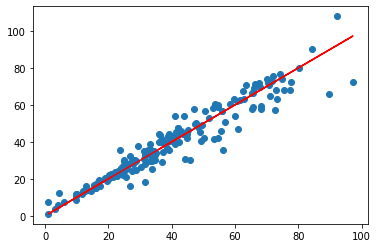

In [350]:
plt.scatter(y_test,predictions)

# Real Value
plt.plot(y_test,y_test,'r')

In [351]:
tf.keras.models.save_model(model, "models/ann.hdf5")

In [ ]:
X_test.to_csv("data/X_test.csv", encoding="utf-8")
y_test.to_csv("data/y_test.csv", encoding="utf-8")